In [2]:
#project 1
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('mxmh_survey_results.csv')

I got the information about the data set of my choice from Kaggle.com, https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results. For my project I chose a data set that represents music and mental health, investigating the correlation of music listening habits and different mental illnesses, and how music effects the quality of someone’s life.  This data set compares different genres of music and how they affect one’s stress, anxiety, depression and many other attributes related to mental health. Music therapy is said to relieve many issues that we face as humans mentally, the data set that I chose gives a wide variety of how music positively and negatively affects mental health. This data set includes many different fields including all of the main genres of music, levels of depression, anxiety, and OCD and how the music effects those levels as well as age, hours of listening per day and many more. The main question that I am going to ask about this data set is, how much does music play a role in a person’s quality of life and their overall mental health. Such as relieving stress, anxiety, depression and other disorders which causes humans to be unhappy. One of my sub questions is how the duration of music listening throughout the day effect one’s mental health. I’m curious to know if listening to more music Improves or decreases different mental health disorders on average. Im curious to see how many hours of music those with a low mental health ranking listen to music as well as those with high mental health rankings. Finally I wanted to know and visualize the age range of people who took apart of this study on music and mental health. 

In [5]:
missing_data = df.isnull().sum()
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)
print(df['Age'] == pd.to_datetime(df['Age']))
print(missing_data)
df.info()

numeric_columns = df.select_dtypes(include='number')
z_scores = (numeric_columns - numeric_columns.mean()) / numeric_columns.std()
z_score_threshold = 3
outlier_mask = (z_scores.abs() > z_score_threshold).any(axis=1)
filtered_data = df[~outlier_mask]

2      False
3      False
4      False
5      False
6      False
       ...  
731    False
732    False
733    False
734    False
735    False
Name: Age, Length: 616, dtype: bool
Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]              

In [6]:
pivot_table = pd.pivot_table(df, values='Depression', index='Frequency [Rock]', columns='Music effects', aggfunc='mean')

print(pivot_table)

Music effects      Improve  No effect    Worsen
Frequency [Rock]                               
Never             3.666667   4.200000  3.750000
Rarely            4.237288   3.823529  5.000000
Sometimes         5.147059   4.186047  8.750000
Very frequently   5.390476   4.868852  8.833333


Creating this pivot table, I used depression levels to aggregate the mean which is the numerical value as well as choosing rock as the genre of music that I was indexing through.  I also chose the effects of the music in the column category. from this pivot table I have found that those who never listen to rock generally have lower levels of depression as compared to those who listen frequently who have on average higher levels of depression. The conclusion that I have made from this pivot table is that the more frequently one listens to the genre of rock the more likely that they are to develop depression. rock music effect on mental health typically worsens as opposed to improving which is a small percentage.

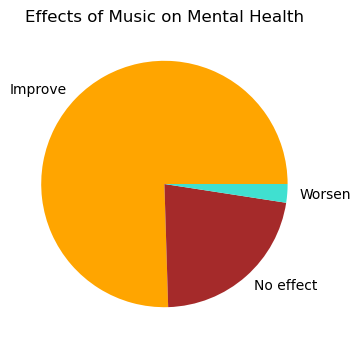

In [7]:
plt.figure(figsize=(5,4))
plt.title('Effects of Music on Mental Health')

effects = df['Music effects'].value_counts()
effects.plot(kind='pie', colors = ["Orange", "brown", "turquoise"], ylabel= '');

I also did an overall pie chart of music in general and how it effects mental health .this pie chart visualizes that almost 75 percent of individuals say that music improves their mental health, as about 20 percent say that it has no effect and a very small percentage say that music worsens their mental health.

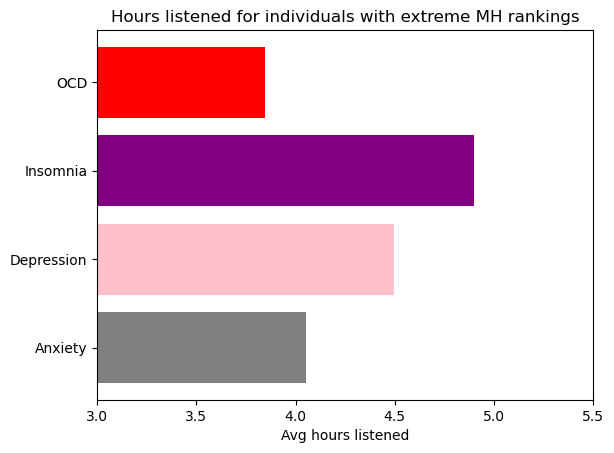

In [8]:
anxiety_extreme = df.loc[(df['Anxiety'] > 8)].mean(numeric_only=True)[1]
depression_extreme = df.loc[(df['Depression'] > 8)].mean(numeric_only=True)[1]
insomnia_extreme = df.loc[(df['Insomnia'] > 8)].mean(numeric_only=True)[1]
ocd_extreme = df.loc[(df['OCD'] > 8)].mean(numeric_only=True)[1]

extreme_means = [anxiety_extreme, depression_extreme, insomnia_extreme, ocd_extreme]

plt.barh(['Anxiety', 'Depression', 'Insomnia', 'OCD'], extreme_means, color=('grey', 'pink', 'purple', 'red'))
  
plt.xlabel("Avg hours listened")
plt.title("Hours listened for individuals with extreme MH rankings")
plt.xlim(3,5.5)
plt.show()

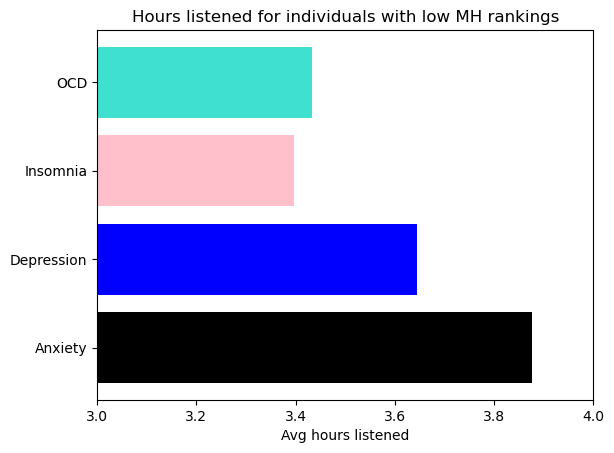

In [9]:
anxiety_extreme2 = df.loc[(df['Anxiety'] < 3)].mean(numeric_only=True)[1]
depression_extreme2 = df.loc[(df['Depression'] < 3)].mean(numeric_only=True)[1]
insomnia_extreme2 = df.loc[(df['Insomnia'] < 3)].mean(numeric_only=True)[1]
ocd_extreme2 = df.loc[(df['OCD'] < 3)].mean(numeric_only=True)[1]

extreme_means = [anxiety_extreme2, depression_extreme2, insomnia_extreme2, ocd_extreme2]

plt.barh(['Anxiety', 'Depression', 'Insomnia', 'OCD'], extreme_means, color=('black', 'blue', 'pink', 'turquoise'))

plt.xlabel("Avg hours listened")
plt.title("Hours listened for individuals with low MH rankings")
plt.xlim(3, 4)
plt.show()

i also created two horizontal bar plots that shows how the amount of time that one listens to music throughout the day positively or negatively effects one mental health. I found that those who were already in a bad mental health ranking and listened to an average of 5 hours or more of music experienced higher levels of depression and insomnia.

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

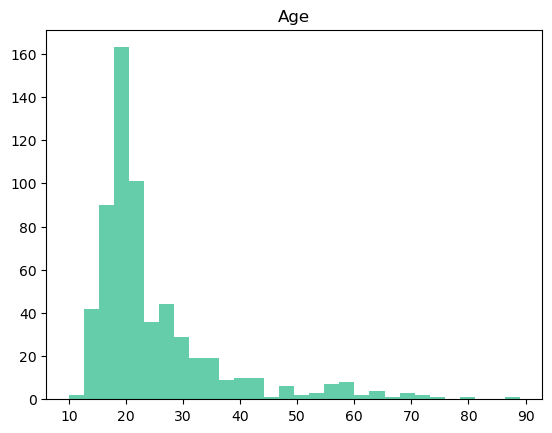

In [10]:
df.hist(['Age'], bins=30, color='mediumaquamarine', grid=False)

finally, I  made a bar chart to visualize the age of people that contributed to this study. i found that most people in this study were in thier teens and early 20's.



Conclusion -    Throughout this project I have found that music does indeed directly affect a great percentage of people. More specifically the genres of which people listen to directly effect a person’s mental health. The data set proves that those who listen to rock music are more inclined to have mental health issues compared to those who listened to a genre which consists of more slow beats and rhythms such as Lofi. This conclusion answered my main question which was, how much does music play a role in the quality of someone’s life. It almost appears as the message or meaning behind what the artists in songs are saying directly corelate to a person’s well-being and peace of mind. Music that consists of very soft beats and positive messages such as pop and lofi were found to improve the quality of life of people who took place in this survey. I also found it interesting that those who listened to music more, typically had higher levels of insomnia. I think that it would have been good for this data set to include the sex of the participants of this study as well as where they are from and possibly if they are already experiencing mental health issues or not in the past. This would give a better insight to allow me to see more aspects of how music can affect people from different sexes and backgrounds. 